In [86]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings

warnings.filterwarnings('ignore')

In [87]:
data = pd.read_csv('/Users/khemendrasai/Downloads/haberman (1).csv')
data.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [88]:
data.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [89]:
data.nunique()

age       49
year      12
nodes     31
status     2
dtype: int64

In [90]:
#calculating no.of rows and columns
data.shape

(306, 4)

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [92]:
#statistics
data.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [93]:
#calculating imbalance
data['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

Observations:

1. Dataset contains data of 306 patients aged between 30 and 83.
2. 75% of the patients have less than 4 nodes.
3. dataset is imbalance with 75% of the patients survived.

Objective:

Find a possible pattern between various attributes such as age,year of operation and no.of lymph nodes
in the survival of breast cancer.

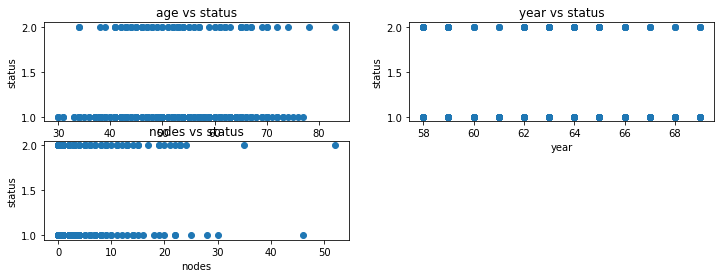

In [94]:
#plotting the ditribution od various attributes with their status to find possible link.

plt.figure(figsize=(12,4))
plt.subplot(221)
plt.plot(data['age'],data['status'],'o')
plt.xlabel('age')
plt.ylabel('status')
plt.title('age vs status')


plt.subplot(222)
plt.plot(data['year'],data['status'],'o')
plt.xlabel('year')
plt.ylabel('status')
plt.title('year vs status')


plt.subplot(223)
plt.plot(data['nodes'],data['status'],'o')
plt.xlabel('nodes')
plt.ylabel('status')
plt.title('nodes vs status')
plt.show()

OBSERVATION:
All the attributes have similar distribution with survival.

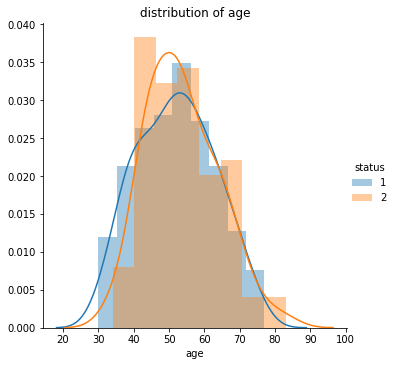

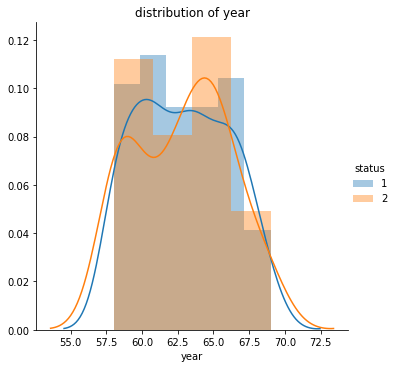

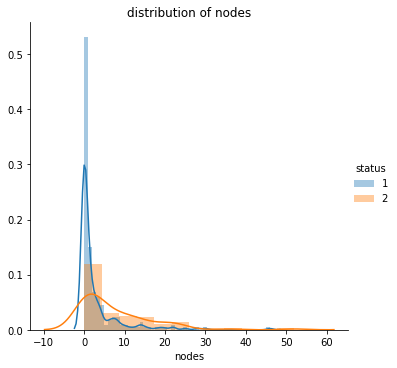

In [95]:
#Plotting individual attributes w.r.t status. All the distributions are similar compared to survival


for i in data.columns[0:3]:   
    sns.FacetGrid(data,hue = 'status',size=5)\
       .map(sns.distplot,i)\
       .add_legend()
    plt.title('distribution of' + ' ' + i)
    plt.show()

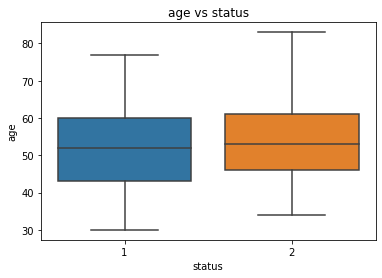

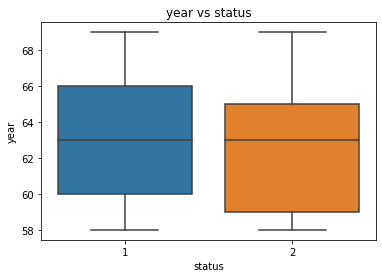

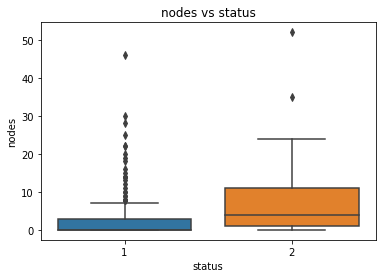

In [96]:
#plotting boxplot to find the quantiles for each attribute

for i in data.columns[0:3]:
    sns.boxplot(x = 'status',y = i,data = data)
    plt.title(i +' ' +'vs status')
    plt.show()

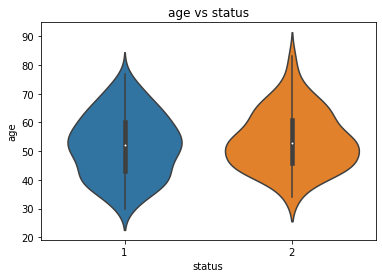

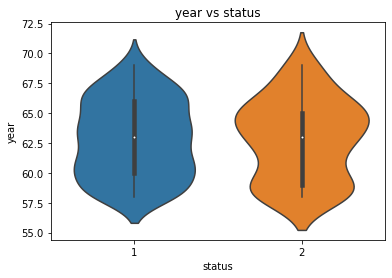

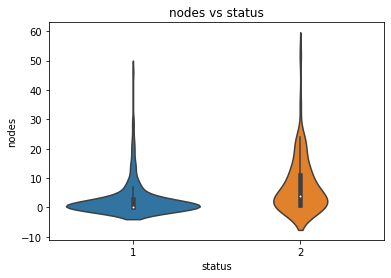

In [97]:
#violin plots are a combination of pdf and boxplots
for i in data.columns[0:3]:
    sns.violinplot(x = 'status',y = i,data = data)
    plt.title(i +' ' +'vs status')
    plt.show()

# CDF AND PDF

As part of the univariate analysis, PDF and CDF distributions are plottes for each variable with status 1 and status 2 separately

In [98]:
data1 = data.loc[data['status'] == 1]
data2 = data.loc[data['status'] == 2]

[0.02222222 0.03111111 0.04444444 0.06222222 0.04444444 0.08
 0.04       0.05333333 0.09777778 0.06666667 0.07555556 0.08888889
 0.04888889 0.04444444 0.08       0.03111111 0.02222222 0.04
 0.01333333 0.01333333]
[30.   32.35 34.7  37.05 39.4  41.75 44.1  46.45 48.8  51.15 53.5  55.85
 58.2  60.55 62.9  65.25 67.6  69.95 72.3  74.65 77.  ]
[0.02469136 0.01234568 0.04938272 0.07407407 0.12345679 0.07407407
 0.07407407 0.12345679 0.09876543 0.03703704 0.03703704 0.08641975
 0.04938272 0.04938272 0.03703704 0.01234568 0.01234568 0.01234568
 0.         0.01234568]
[34.   36.45 38.9  41.35 43.8  46.25 48.7  51.15 53.6  56.05 58.5  60.95
 63.4  65.85 68.3  70.75 73.2  75.65 78.1  80.55 83.  ]


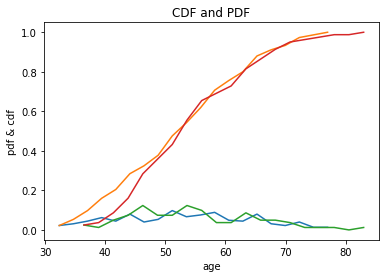

In [99]:
counts,bin_edges = np.histogram(data1['age'],bins=20,density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)


counts,bin_edges = np.histogram(data2['age'],bins=20,density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.xlabel('age')
plt.ylabel('pdf & cdf')
plt.title('CDF and PDF')
plt.show()

[0.10666667 0.08       0.         0.10666667 0.         0.10222222
 0.         0.07111111 0.         0.09777778 0.10222222 0.
 0.06666667 0.         0.09777778 0.         0.09333333 0.
 0.04444444 0.03111111]
[58.   58.55 59.1  59.65 60.2  60.75 61.3  61.85 62.4  62.95 63.5  64.05
 64.6  65.15 65.7  66.25 66.8  67.35 67.9  68.45 69.  ]
[0.14814815 0.11111111 0.         0.04938272 0.         0.03703704
 0.         0.08641975 0.         0.09876543 0.09876543 0.
 0.16049383 0.         0.07407407 0.         0.04938272 0.
 0.03703704 0.04938272]
[58.   58.55 59.1  59.65 60.2  60.75 61.3  61.85 62.4  62.95 63.5  64.05
 64.6  65.15 65.7  66.25 66.8  67.35 67.9  68.45 69.  ]


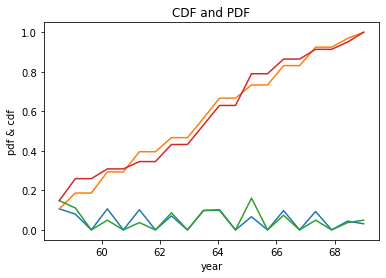

In [100]:
counts,bin_edges = np.histogram(data1['year'],bins=20,density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)


counts,bin_edges = np.histogram(data2['year'],bins=20,density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.xlabel('year')
plt.ylabel('pdf & cdf')
plt.title('CDF and PDF')
plt.show()

[0.73333333 0.10222222 0.02666667 0.05333333 0.01333333 0.00888889
 0.02222222 0.00444444 0.00888889 0.00888889 0.00444444 0.
 0.00444444 0.00444444 0.         0.         0.         0.
 0.         0.00444444]
[ 0.   2.3  4.6  6.9  9.2 11.5 13.8 16.1 18.4 20.7 23.  25.3 27.6 29.9
 32.2 34.5 36.8 39.1 41.4 43.7 46. ]
[0.39506173 0.17283951 0.0617284  0.08641975 0.04938272 0.08641975
 0.01234568 0.03703704 0.0617284  0.01234568 0.         0.
 0.         0.01234568 0.         0.         0.         0.
 0.         0.01234568]
[ 0.   2.6  5.2  7.8 10.4 13.  15.6 18.2 20.8 23.4 26.  28.6 31.2 33.8
 36.4 39.  41.6 44.2 46.8 49.4 52. ]


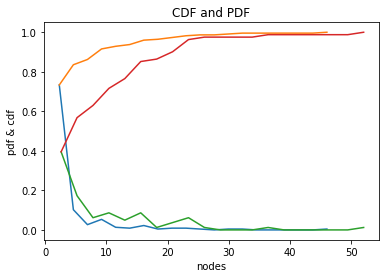

In [101]:
counts,bin_edges = np.histogram(data1['nodes'],bins=20,density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)


counts,bin_edges = np.histogram(data2['nodes'],bins=20,density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.xlabel('nodes')
plt.ylabel('pdf & cdf')
plt.title('CDF and PDF')
plt.show()

# Pair Plots for Bivariate Analysis

Pair plots are plotted to find possible relation betwee each variable

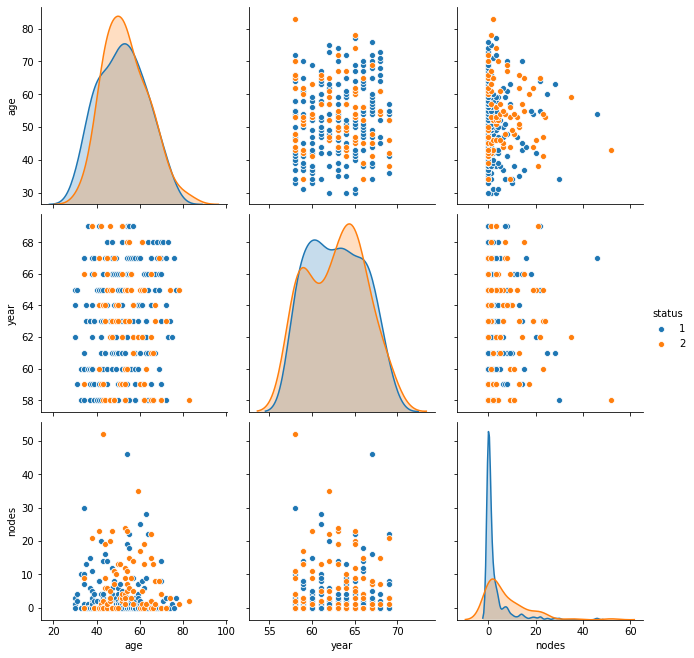

In [102]:
sns.pairplot(data,hue = 'status',size = 3)
plt.show()

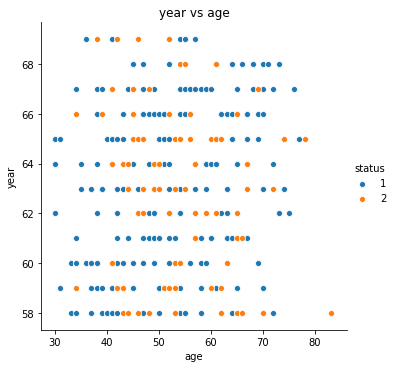

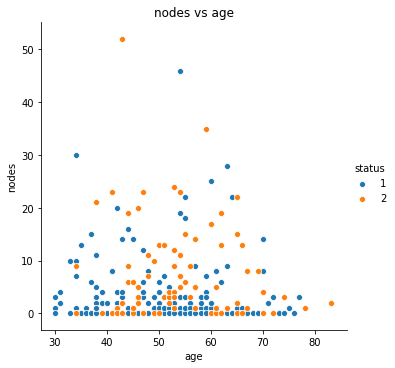

In [103]:
#scatterplots are plotted
for x in data.columns[1:3]:
    sns.FacetGrid(data,hue='status',size =5)\
       .map(sns.scatterplot,'age',x)\
       .add_legend()
    plt.title(x +' ' +'vs age')
    plt.show()

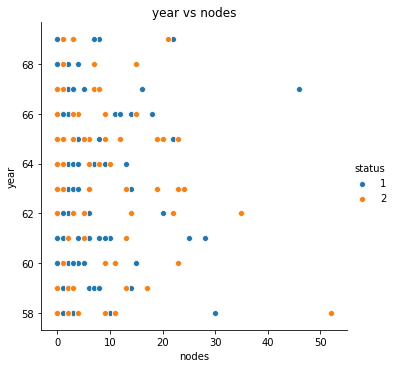

In [104]:
sns.FacetGrid(data,hue='status',size =5)\
    .map(sns.scatterplot,'nodes','year')\
    .add_legend()
plt.title('year vs nodes')
plt.show()

# OBSERVATIONS

Although, we could not make a conclusive statement with the data provided and the distribution of data due to the class imbalance, from the pair plot of year and nodes, we can observe that people with lower no.of nodes have survived. Same can be concluded with distplot of nodes. It is evident that survival chances for people with higher number of nodes is very low.